## 1. Importing necessary libraries

In [1764]:
import pandas as pd 
import numpy as np
from catboost import CatBoostClassifier
import seaborn as sns # for charts
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier

## 2. Reading Data

In [1765]:
net_train=pd.read_csv('train.csv',na_values=" ?")
x_test=pd.read_csv('test.csv',na_values=" ?")

In [1766]:
net_train.head(10)

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [1767]:
net_train.columns

Index(['age', 'work-class', 'work-fnl', 'education', 'education-num',
       'marital-status', 'position', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [1768]:
x_test.columns

Index(['age', 'work-class', 'work-fnl', 'education', 'education-num',
       'marital-status', 'position', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [1769]:
net_train.drop_duplicates(inplace=True)
net_train.isna().sum()

age                  0
work-class        1275
work-fnl             0
education            0
education-num        0
marital-status       0
position          1279
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     408
salary               0
dtype: int64

In [1770]:
net_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22777 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22777 non-null  int64 
 1   work-class      21502 non-null  object
 2   work-fnl        22777 non-null  int64 
 3   education       22777 non-null  object
 4   education-num   22777 non-null  int64 
 5   marital-status  22777 non-null  object
 6   position        21498 non-null  object
 7   relationship    22777 non-null  object
 8   race            22777 non-null  object
 9   sex             22777 non-null  object
 10  capital-gain    22777 non-null  int64 
 11  capital-loss    22777 non-null  int64 
 12  hours-per-week  22777 non-null  int64 
 13  native-country  22369 non-null  object
 14  salary          22777 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


In [1771]:
net_train.describe()

,age,work-fnl,education-num,capital-gain,capital-loss,hours-per-week
count,22777.000000,2.277700e+04,22777.000000,22777.000000,22777.000000,22777.000000
mean,38.596918,1.896490e+05,10.085349,1061.931642,86.787154,40.413926
std,13.652581,1.049714e+05,2.555376,7345.058911,401.096678,12.281707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.183760e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.367840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1772]:
categorical_cols = [x for x in net_train.columns if net_train[x].dtype =="object"]
numerical_cols = [x for x in net_train.columns if x not in categorical_cols]

**Categorical Data:**
- `work-class`,  `marital-status`, `position`, `relationship`, `race`, `sex`, `native-country`; *nominal*
- `education`; *ordinal*

**Numerical Data:**
- `age`, `work-fnl`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week` ; *continuous*

**Target Variable**
- `salary`

We also have some missing values to deal with:

## 3.Cleaning the Categorical data


### 3.1 Remove outliers and visualize the Categorical data


In [1773]:
net_train.salary.value_counts()

 <=50K    17340
 >50K      5437
Name: salary, dtype: int64

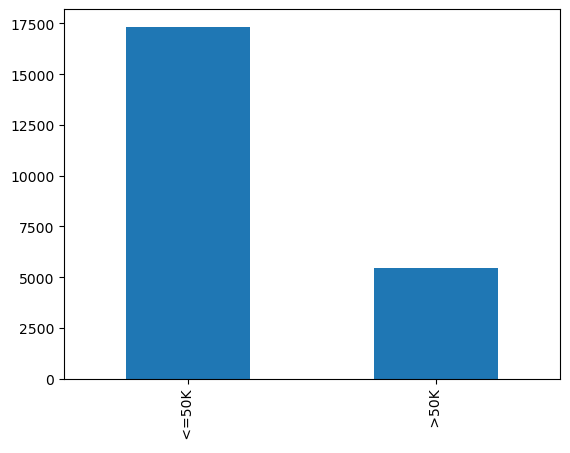

In [1774]:
net_train.salary.value_counts().plot(kind='bar')
plt.show()

#### As shown in the diagram the data is imbalanced


In [1775]:
for i in categorical_cols:
    print("-----"+i+"-----")
    print(net_train[i].value_counts(normalize=True))
    print("\n")


-----work-class-----
 Private             0.736118
 Self-emp-not-inc    0.084364
 Local-gov           0.069063
 State-gov           0.041485
 Self-emp-inc        0.036276
 Federal-gov         0.032137
 Without-pay         0.000372
 Never-worked        0.000186
Name: work-class, dtype: float64


-----education-----
 HS-grad         0.325723
 Some-college    0.223515
 Bachelors       0.166089
 Masters         0.052816
 Assoc-voc       0.042236
 11th            0.036309
 Assoc-acdm      0.031611
 10th            0.028669
 7th-8th         0.019493
 Prof-school     0.016947
 9th             0.015586
 Doctorate       0.012469
 12th            0.012469
 5th-6th         0.009878
 1st-4th         0.004829
 Preschool       0.001361
Name: education, dtype: float64


-----marital-status-----
 Married-civ-spouse       0.458225
 Never-married            0.328314
 Divorced                 0.137814
 Separated                0.031084
 Widowed                  0.030513
 Married-spouse-absent    0.013391

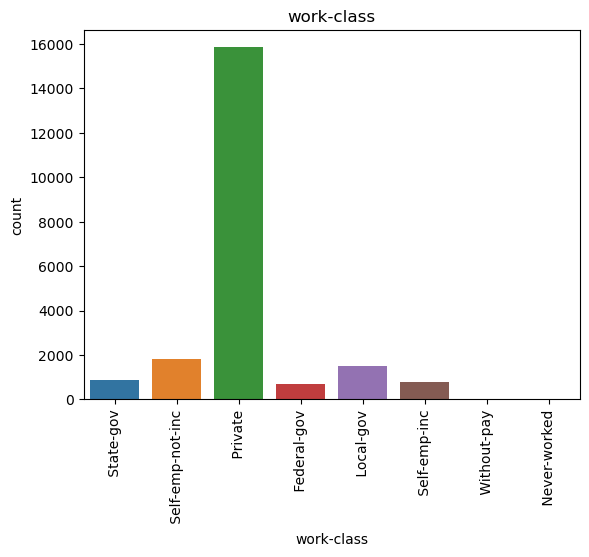

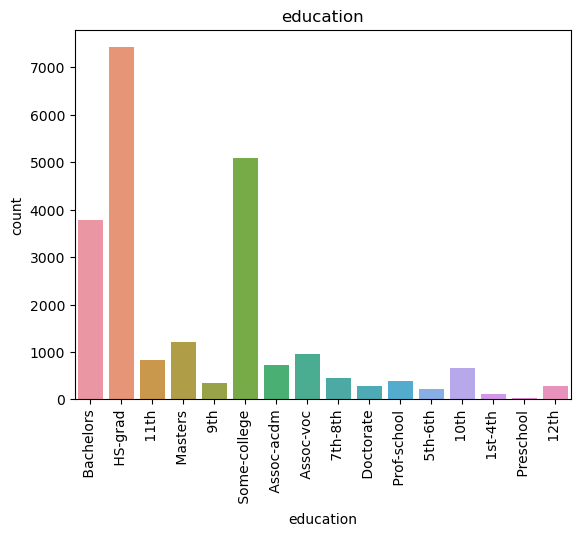

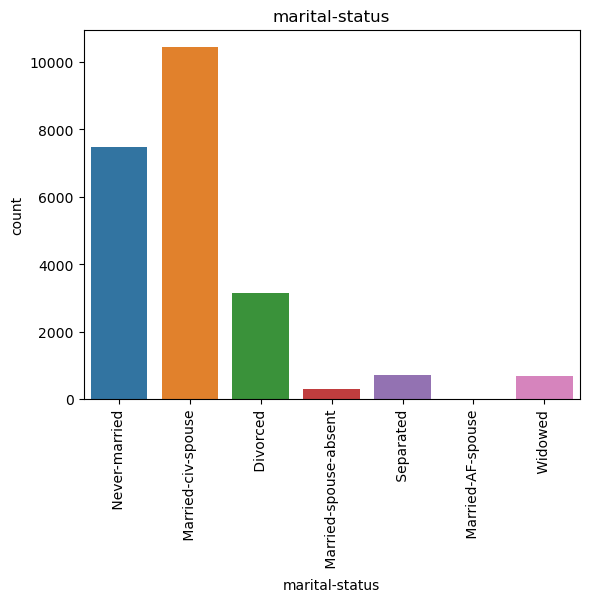

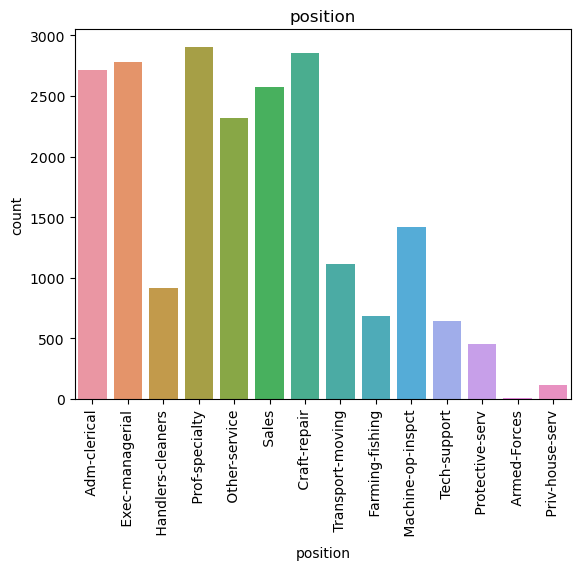

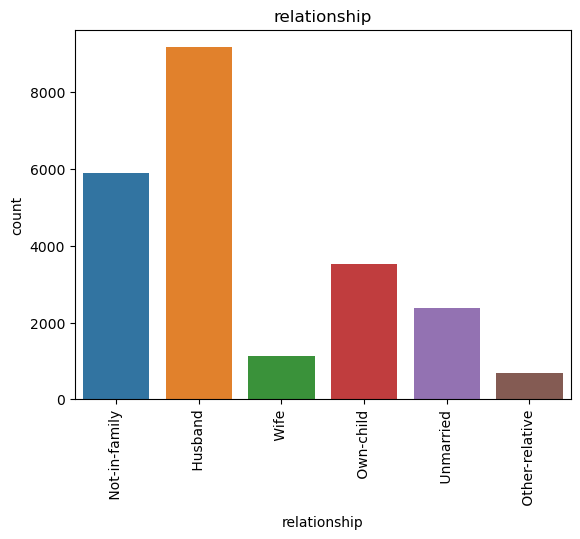

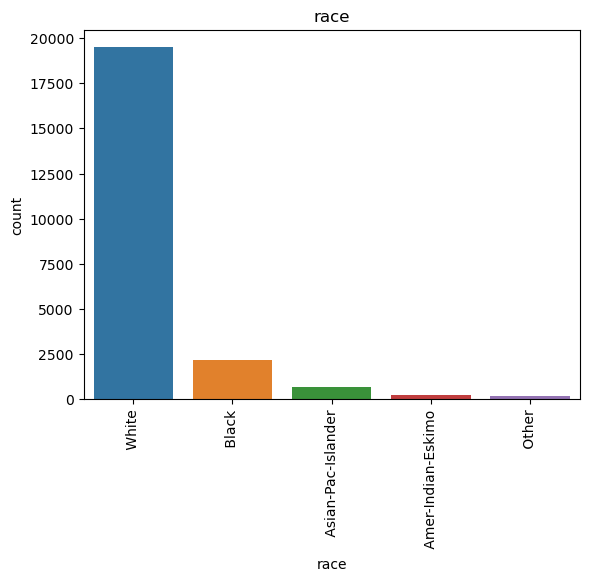

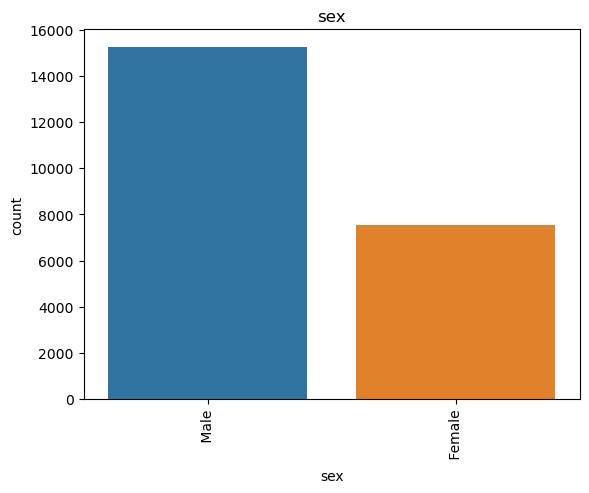

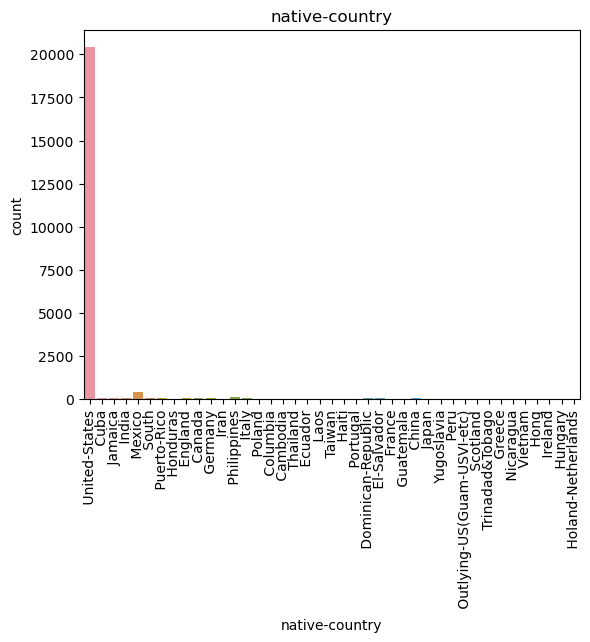

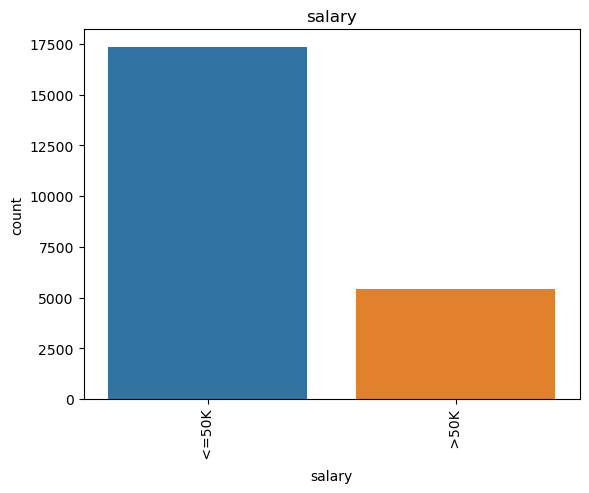

In [1776]:
for i in categorical_cols:
    plt.title(i)
    sns.countplot(x = net_train[i])
    
    plt.xticks(rotation=90)
    plt.show()


####  Which age gets more money ?

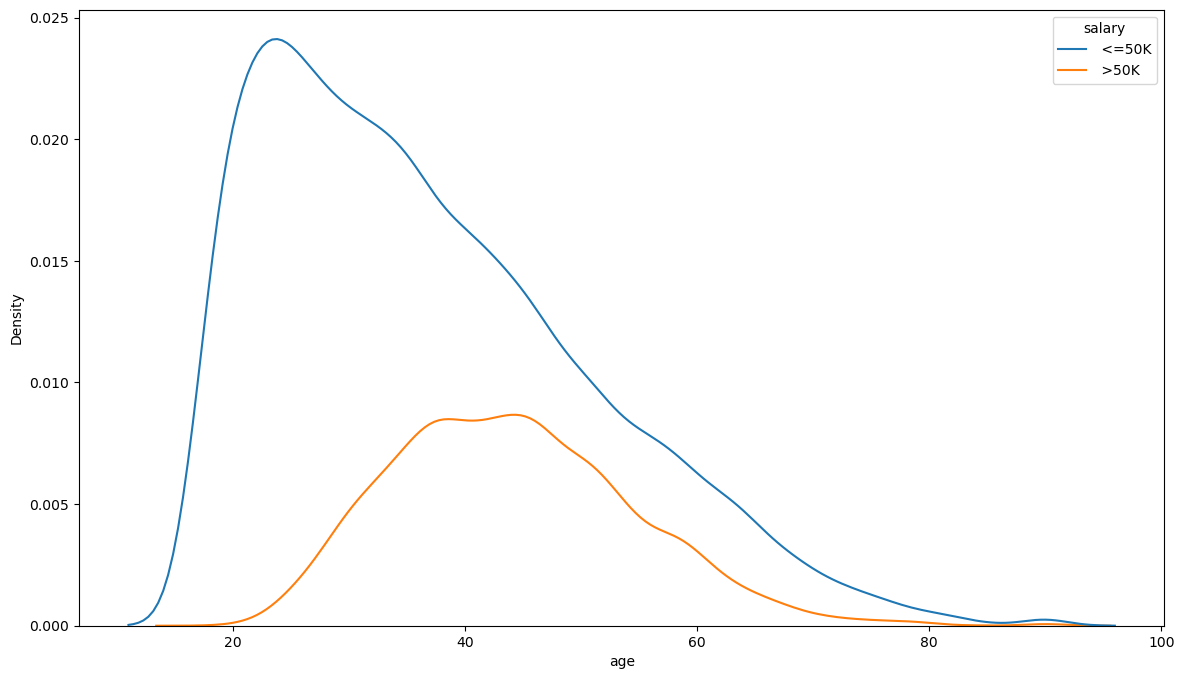

In [1777]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = net_train , x = 'age' ,hue='salary')
plt.show()

In [1778]:
outlier_young = net_train[(net_train.age <=20)&(net_train['salary'] ==' >50K')]
outlier_young

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7741,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K


In [1779]:
outlier_old = net_train[(net_train.age >=80)&(net_train['salary'] ==' <50K')]
outlier_old

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


 As we can see there is no one or we can say that in normal stages people who under 20 years old cant get year salary more than 50k in a year so we have to remove them becaue its uncommen and will affect our data while the people who are more than 80 year get more than 50k in a year and this is normal.

In [1780]:
net_train.drop(net_train.loc[outlier_young.index].index,axis=0,inplace=True)

####  How dose working hours per week impacts on the salary?

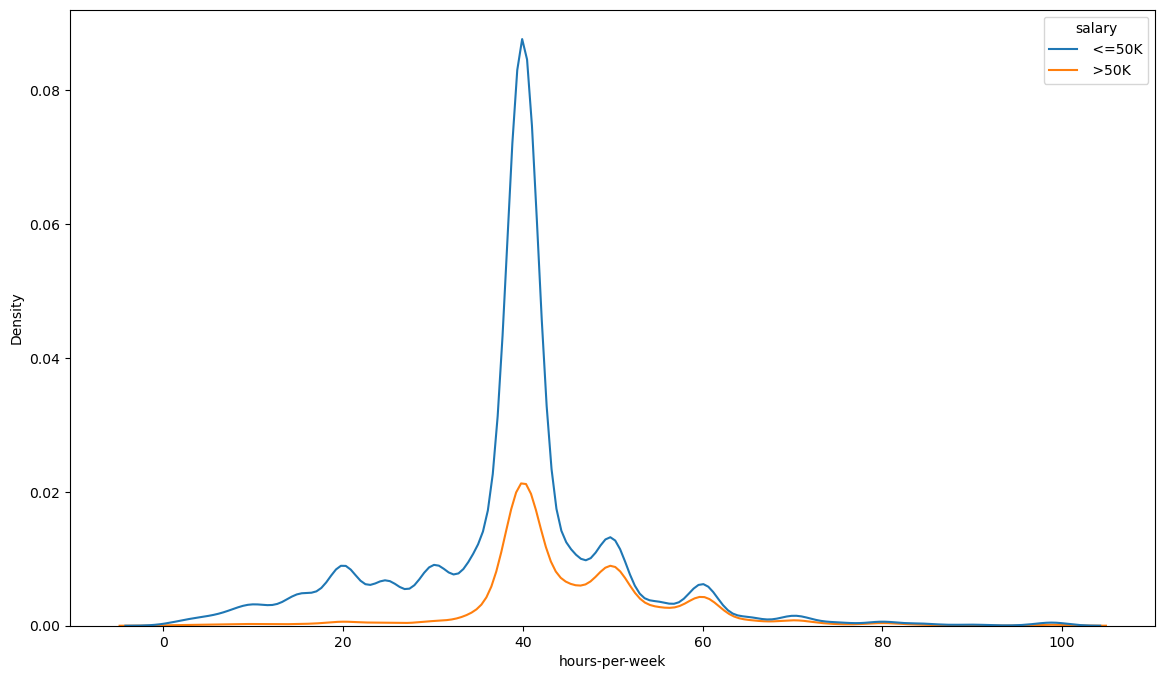

In [1781]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = net_train , x = 'hours-per-week' ,hue='salary')
plt.show()

In [1782]:
outlier_young = net_train[(net_train['hours-per-week'] <=20)&(net_train['salary'] ==' >50K')&(net_train.age <=30)]
outlier_young

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,16,United-States,>50K
4961,28,Private,51331,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,16,United-States,>50K
6143,28,Local-gov,191177,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,20,United-States,>50K
10736,30,Private,243190,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K
18675,30,Self-emp-not-inc,166961,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
21927,30,Private,89625,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,5,United-States,>50K


In [1783]:
net_train.drop(net_train.loc[outlier_young.index].index,axis=0,inplace=True)

as we can see under normal circumstances people getting paid 50k that are younger than 30 years old and work more than 20 hours are uncommon therefore  we need to drop them in order to balance the data.

In [1784]:
outlier_old = net_train[(net_train['hours-per-week'] >=80)&(net_train['salary'] ==' <=50K')&(net_train.age >=40)]
outlier_old

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
272,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,<=50K
589,57,Self-emp-inc,103948,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,80,United-States,<=50K
1929,57,Private,195176,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,80,United-States,<=50K
2920,63,Self-emp-not-inc,26904,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,98,United-States,<=50K
2959,48,Self-emp-inc,26145,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,80,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20878,61,Self-emp-not-inc,224784,Assoc-acdm,12,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,90,United-States,<=50K
21056,64,Local-gov,142166,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
22216,45,Private,54260,Some-college,10,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K
22237,62,Private,153148,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,84,United-States,<=50K


In [1785]:
net_train.drop(net_train.loc[outlier_old.index].index,axis=0,inplace=True)

on the other hand people getting paid less than 50k that are older than 40 years old and work more than 80 hours also uncommon and unusual so we need to drop them because people older than 40 years usually are managers. 

#### impact of number of education years on the salary ?

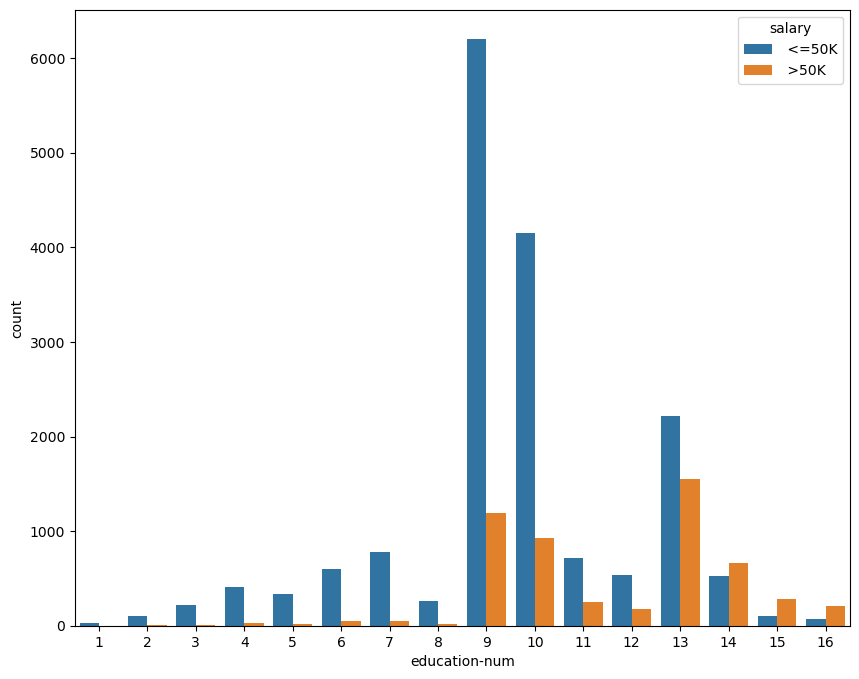

In [1786]:
plt.figure(figsize=(10,8))
sns.countplot(data =net_train , x = 'education-num', hue = 'salary')
plt.show()


As shown in the chart , people getting paid more than 50k increases as the years of education increase and vice versa 


#### which gender gets more money  ? 

In [1787]:
per_man_women=pd.get_dummies(net_train , columns=['salary'])
per_man_women=pd.pivot_table(per_man_women,  index='education-num',columns= 'sex',values=['salary_ <=50K' , 'salary_ >50K'],    
               aggfunc=np.sum).reset_index()
per_man_women['salary_ >50K'] = (per_man_women['salary_ >50K'] / (per_man_women['salary_ >50K']+ per_man_women['salary_ <=50K']))


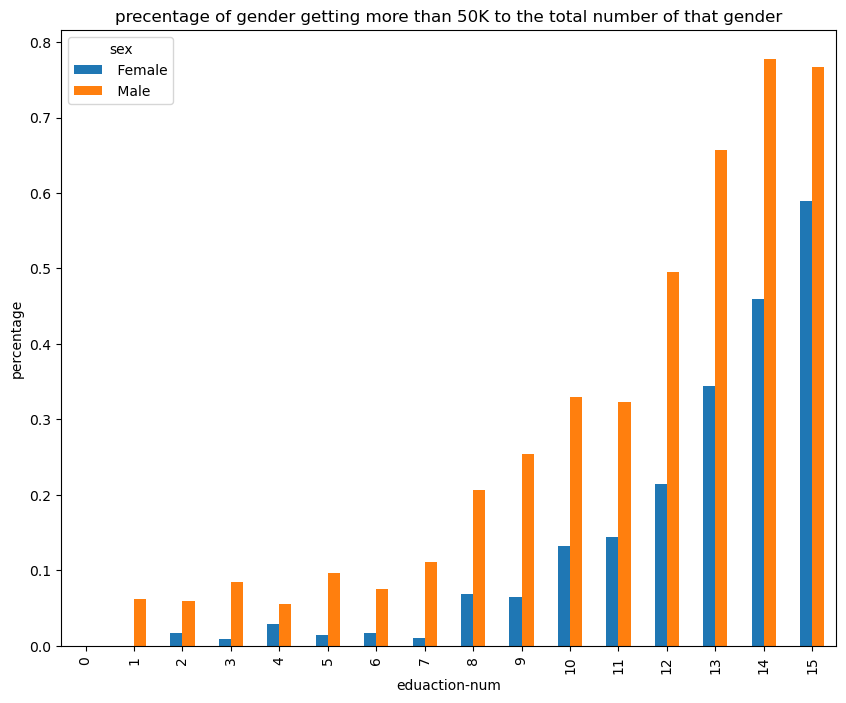

In [1788]:
per_man_women['salary_ >50K'].plot(figsize=(10,8), kind = 'bar')
plt.title('precentage of gender getting more than 50K to the total number of that gender')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

As shown in the chart above , statistically males are getting paid more than females so  males have priority than female


In [1789]:
race = [' White', ' Black']
stra=net_train.loc[net_train["race"].isin(race)]
stra["race"].unique()

array([' White', ' Black'], dtype=object)

In [1790]:
per_white_black=pd.get_dummies(stra , columns=['salary'])
per_white_black=pd.pivot_table(per_white_black,  index='education-num',columns= 'race',values=['salary_ <=50K' , 'salary_ >50K'],    
               aggfunc=np.sum).reset_index()
per_white_black['salary_ >50K'] = (per_white_black['salary_ >50K'] / (per_white_black['salary_ >50K']+ per_white_black['salary_ <=50K']))


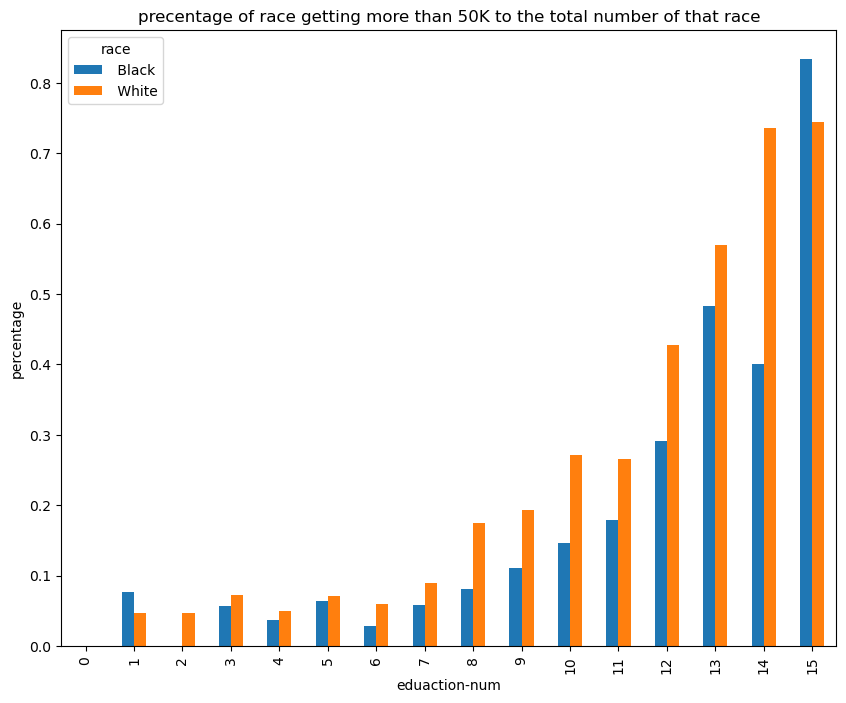

In [1791]:
per_white_black['salary_ >50K'].plot(figsize=(10,8), kind = 'bar')
plt.title('precentage of race getting more than 50K to the total number of that race')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

change is random and doesnot depend on the race

   ### 3.2 Bucketing

In [1792]:
y_train=net_train["salary"]
x_train=net_train.iloc[0:,0:14]
x_train.reset_index(drop=True, inplace=True)
test_size=len(x_test)
train_size=len(x_train)
# train=pd.concat([x_train,x_test])

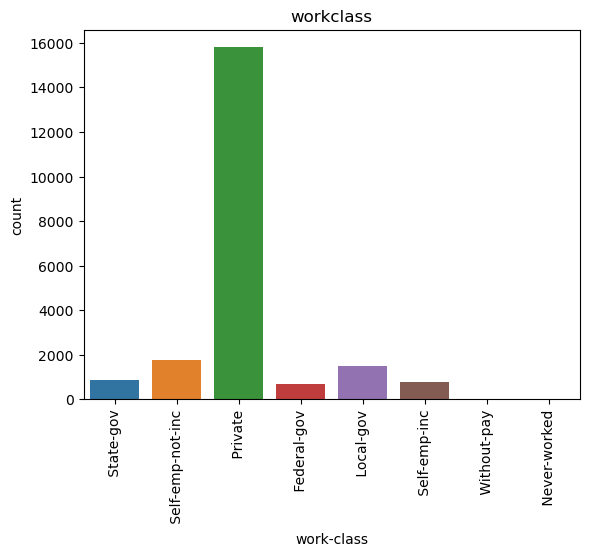

In [1793]:
plt.title("workclass")
sns.countplot(x = x_train['work-class'])    
plt.xticks(rotation=90)
plt.show()

In [1794]:
def buk_work(x):
    check = [' Without-pay',' Never-worked']
    if x in check:
        return "others"
    else:
        return x

x_test["work-class"] = pd.DataFrame(map(buk_work,x_test["work-class"]))
x_train["work-class"] = pd.DataFrame(map(buk_work,x_train["work-class"]))


In [1795]:
x_train["work-class"].value_counts()

 Private             15796
 Self-emp-not-inc     1786
 Local-gov            1481
 State-gov             892
 Self-emp-inc          769
 Federal-gov           690
others                  12
Name: work-class, dtype: int64

In [1796]:
x_test["work-class"].value_counts()

 Private             6854
 Self-emp-not-inc     726
 Local-gov            608
 State-gov            406
 Self-emp-inc         336
 Federal-gov          269
others                  9
Name: work-class, dtype: int64

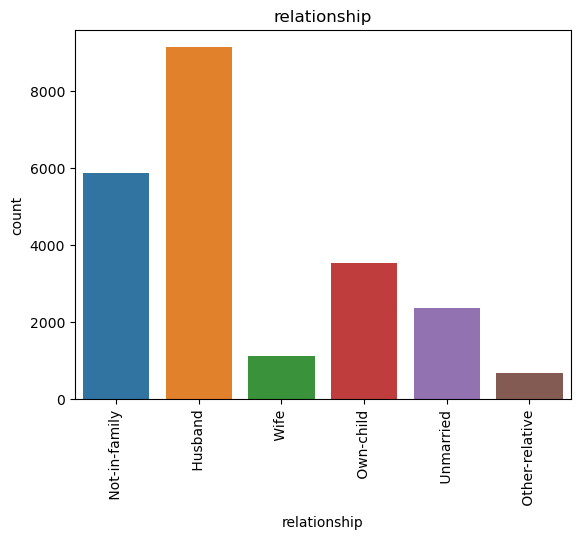

In [1797]:
plt.title("relationship")
sns.countplot(x = x_train['relationship'])    
plt.xticks(rotation=90)
plt.show()

m4 hn buck 34an al values oryba mn b3d 

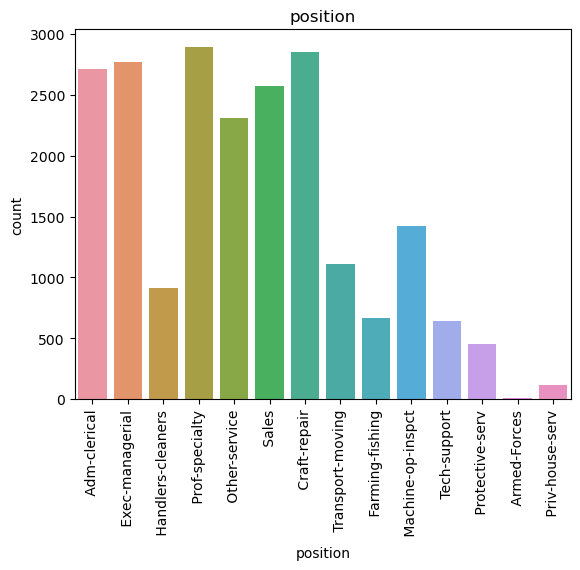

In [1798]:
plt.title("position")
sns.countplot(x = x_train['position'])    
plt.xticks(rotation=90)
plt.show()

In [1799]:
def buc_position(x):
    check = [' Protective-serv',' Priv-house-serv',' Armed-Forces']
    if x in check:
        return "others"
    else:
        return x

x_train["position"] = pd.DataFrame(map(buc_position,x_train["position"]))
x_test["position"] = pd.DataFrame(map(buc_position,x_test["position"]))

In [1800]:
x_test["work-class"].value_counts()

 Private             6854
 Self-emp-not-inc     726
 Local-gov            608
 State-gov            406
 Self-emp-inc         336
 Federal-gov          269
others                  9
Name: work-class, dtype: int64

In [1801]:
def buc_martial(x):
    check = [ 'Separated',' Widowed',' Married-spouse-absent',' Married-AF-spouse']
    if x in check:
        return "others"
    else:
        return x

x_train["marital-status"] = pd.DataFrame(map(buc_martial,x_train["marital-status"]))
x_test["marital-status"] = pd.DataFrame(map(buc_martial,x_test["marital-status"]))

In [1802]:
x_train["position"].value_counts()

 Prof-specialty       2892
 Craft-repair         2848
 Exec-managerial      2773
 Adm-clerical         2711
 Sales                2572
 Other-service        2307
 Machine-op-inspct    1419
 Transport-moving     1108
 Handlers-cleaners     912
 Farming-fishing       667
 Tech-support          639
others                 574
Name: position, dtype: int64

In [1803]:
x_test["position"].value_counts()

 Exec-managerial      1283
 Craft-repair         1242
 Prof-specialty       1235
 Sales                1072
 Adm-clerical         1057
 Other-service         978
 Machine-op-inspct     582
 Transport-moving      482
 Handlers-cleaners     456
 Farming-fishing       306
 Tech-support          285
others                 227
Name: position, dtype: int64

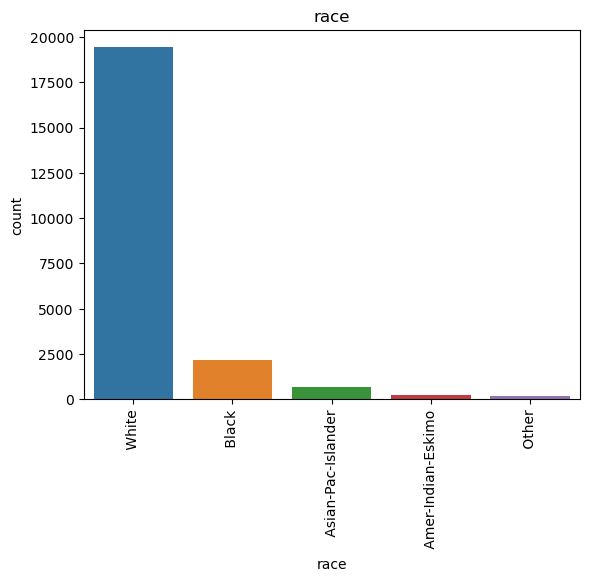

In [1804]:
plt.title("race")
sns.countplot(x = x_train['race'])    
plt.xticks(rotation=90)
plt.show()

In [1805]:
def buc_race(x):
    check = [' Amer-Indian-Eskimo',' Other',' Asian-Pac-Islander']
    if x in check:
        return "others"
    else:
        return x

x_train["race"] = pd.DataFrame(map(buc_race,x_train["race"]))
x_test["race"] = pd.DataFrame(map(buc_race,x_test["race"]))

In [1806]:
x_train["race"].value_counts()

 White    19414
 Black     2162
others     1123
Name: race, dtype: int64

In [1807]:
x_test["race"].value_counts()

 White    8323
 Black     957
others     489
Name: race, dtype: int64

In [1808]:
x_test

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Self-emp-not-inc,21472,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,22,United-States
1,32,Private,90969,Assoc-voc,11,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States
2,26,Private,149734,HS-grad,9,Separated,Craft-repair,Unmarried,Black,Female,0,1594,40,United-States
3,42,Private,52849,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
4,39,Self-emp-not-inc,106347,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,47,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,19,Private,93518,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
9765,25,NaN,126797,HS-grad,9,others,NaN,Not-in-family,White,Male,0,0,40,United-States
9766,57,Self-emp-not-inc,25124,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States
9767,21,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,others,Female,0,0,20,South


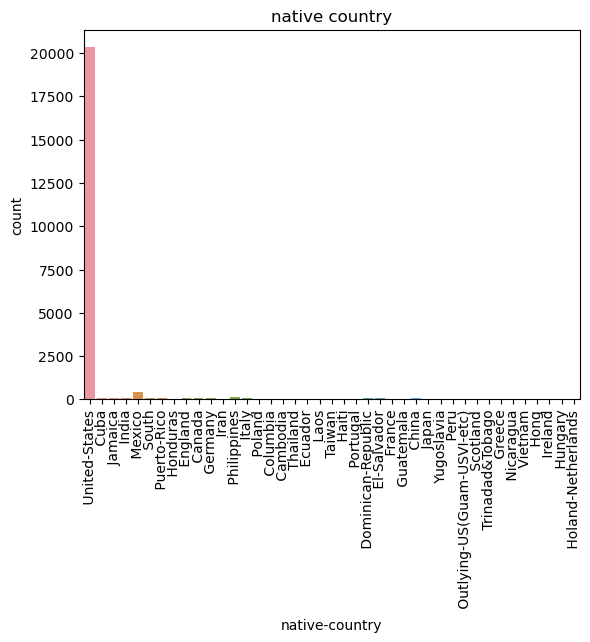

In [1809]:
plt.title("native country")
sns.countplot(x = x_train['native-country'])    
plt.xticks(rotation=90)
plt.show()

In [1810]:
def buc_native_country(x):
    check = [' Greece',' Vietnam', ' China',' Taiwan', ' India', ' Philippines', ' Trinadad&Tobago', ' Canada',' South', ' Holand-Netherlands', ' Puerto-Rico', ' Poland', ' Iran',' England', ' Germany', ' Italy', ' Japan', ' Hong', ' Honduras', ' Cuba',' Ireland', ' Cambodia', ' Peru', ' Nicaragua', ' Dominican-Republic',' Haiti', ' El-Salvador', ' Hungary', ' Columbia', ' Guatemala',' Jamaica', ' Ecuador', ' France', ' Yugoslavia', ' Scotland',' Portugal', ' Laos', ' Thailand', ' Outlying-US(Guam-USVI-etc)',' others']
    if x in check:
        return "others"
    else:
        return x
x_train["native-country"] = pd.DataFrame(map(buc_native_country,x_train["native-country"]))
x_test["native-country"] = pd.DataFrame(map(buc_native_country,x_test["native-country"]))


In [1811]:
x_train["native-country"].value_counts()

 United-States    20334
others             1522
 Mexico             437
Name: native-country, dtype: int64

In [1812]:
x_test["native-country"].value_counts()

 United-States    8755
others             638
 Mexico            202
Name: native-country, dtype: int64

   ### 4.Fill the nulls in categorical data 

In [1813]:
x_train.fillna("others",inplace=True)
x_train.isna().sum()

age               0
work-class        0
work-fnl          0
education         0
education-num     0
marital-status    0
position          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [1814]:
x_test.fillna("others",inplace=True)
x_test.isna().sum()

age               0
work-class        0
work-fnl          0
education         0
education-num     0
marital-status    0
position          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### 5. Label Categorical Data

   ### 5.1) Encode the label

In [1815]:
y_label=LabelEncoder()

In [1816]:
y_label.fit(y_train)
y_label.classes_

array([' <=50K', ' >50K'], dtype=object)

In [1817]:
y_train=pd.Series(y_label.transform(y_train))
y_train

0        0
1        0
2        0
3        0
4        0
        ..
22694    0
22695    0
22696    0
22697    0
22698    1
Length: 22699, dtype: int32

   ### 5.2) Encode the ordinal data

In [1818]:
x_train["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [1819]:
x_train["education"]

0            Bachelors
1            Bachelors
2              HS-grad
3                 11th
4            Bachelors
             ...      
22694     Some-college
22695     Some-college
22696     Some-college
22697             12th
22698          Masters
Name: education, Length: 22699, dtype: object

In [1820]:
order_education=[' Preschool',' 1st-4th',' 5th-6th', ' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school',' Some-college',' Assoc-acdm',' Assoc-voc',' Bachelors',' Masters',' Doctorate']

In [1821]:
education_label=OrdinalEncoder(categories=[order_education])

In [1822]:
education_label.fit(x_train[["education"]])
x_train["education"]=pd.DataFrame(education_label.transform(x_train[["education"]]))
x_train["education"]

0        13.0
1        13.0
2         8.0
3         6.0
4        13.0
         ... 
22694    10.0
22695    10.0
22696    10.0
22697     7.0
22698    14.0
Name: education, Length: 22699, dtype: float64

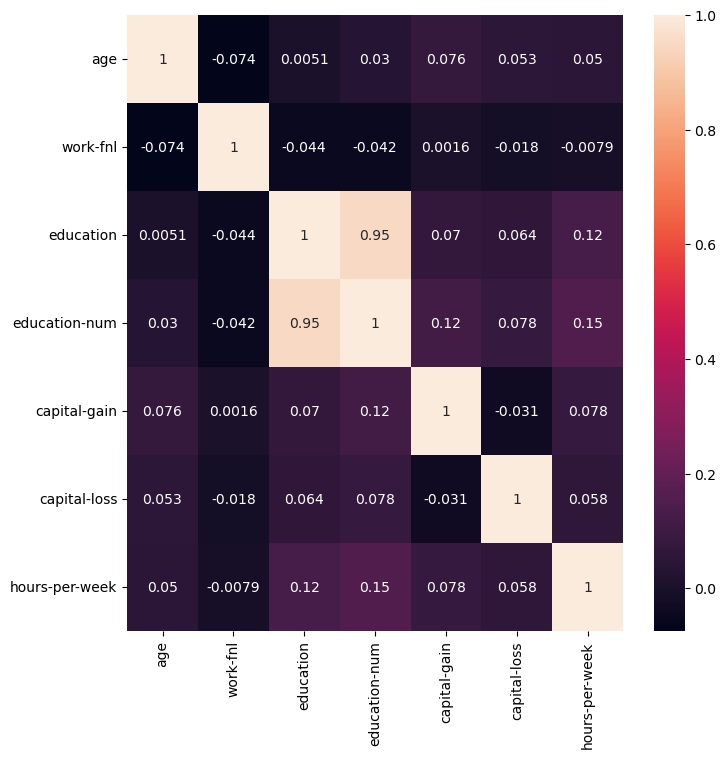

In [1823]:
# Heatmap
corr_matrix = x_train.corr()
plt.figure(figsize = (8,8))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

# sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

As we can see that Education column is nearly perfect corilated with Education-num,so we will drop Education column 

In [1824]:
x_train.drop(['education'], axis = 1, inplace = True) 
x_test.drop(['education'], axis = 1, inplace = True) 

hndrop al martial statius 34an coulnm al relation by8ny 3no

In [1825]:
# x_train.drop(['marital-status'], axis = 1, inplace = True) 
# x_test.drop(['marital-status'], axis = 1, inplace = True) 

hn encode al sex w ndy al male piriorty 

In [1826]:
x_train["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [1827]:
x_test["sex"]

0        Female
1          Male
2        Female
3          Male
4          Male
         ...   
9764     Female
9765       Male
9766       Male
9767     Female
9768     Female
Name: sex, Length: 9769, dtype: object

In [1828]:
order_sex=[' Female'," Male"]

In [1829]:
sex_label=OrdinalEncoder(categories=[order_sex])

In [1830]:
sex_label.fit(x_train[["sex"]])
x_train["sex"]=pd.DataFrame(sex_label.transform(x_train[["sex"]]))


In [1831]:
sex_label.fit(x_test[["sex"]])
x_test["sex"]=pd.DataFrame(sex_label.transform(x_test[["sex"]]))
x_test["sex"]

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9764    0.0
9765    1.0
9766    1.0
9767    0.0
9768    0.0
Name: sex, Length: 9769, dtype: float64

   ### 5.3) Encode the nominal data

In [1832]:
race_ser=pd.get_dummies(x_train["race"])
race_ser.drop(['others'], axis = 1, inplace = True) 

In [1833]:
relationship_ser=pd.get_dummies(x_train["relationship"])

In [1834]:
position_ser=pd.get_dummies(x_train["position"])
position_ser.drop(['others'], axis = 1, inplace = True) 

In [1835]:
work_class_ser=pd.get_dummies(x_train["work-class"])
work_class_ser.drop(['others'], axis = 1, inplace = True) 

In [1836]:
marital_status_ser=pd.get_dummies(x_train["marital-status"])
marital_status_ser.drop(['others'], axis = 1, inplace = True) 

In [1837]:
native_country_ser=pd.get_dummies(x_train["native-country"])
native_country_ser.drop(['others'], axis = 1, inplace = True) 

In [1838]:
x_train.drop(['race','relationship','work-class',"native-country","position","marital-status"], axis = 1, inplace = True) 

In [1840]:
x_train=pd.concat([x_train,work_class_ser,position_ser,marital_status_ser,relationship_ser],axis = 1)

In [1841]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  22699 non-null  int64  
 1   work-fnl             22699 non-null  int64  
 2   education-num        22699 non-null  int64  
 3   sex                  22699 non-null  float64
 4   capital-gain         22699 non-null  int64  
 5   capital-loss         22699 non-null  int64  
 6   hours-per-week       22699 non-null  int64  
 7    Federal-gov         22699 non-null  uint8  
 8    Local-gov           22699 non-null  uint8  
 9    Private             22699 non-null  uint8  
 10   Self-emp-inc        22699 non-null  uint8  
 11   Self-emp-not-inc    22699 non-null  uint8  
 12   State-gov           22699 non-null  uint8  
 13   Adm-clerical        22699 non-null  uint8  
 14   Craft-repair        22699 non-null  uint8  
 15   Exec-managerial     22699 non-null 

In [1842]:
work_class_ser=pd.get_dummies(x_test["work-class"])
work_class_ser.drop(['others'], axis = 1, inplace = True) 
relationship_ser=pd.get_dummies(x_test["relationship"])
race_ser=pd.get_dummies(x_test["race"])
race_ser.drop(['others'], axis = 1, inplace = True) 
position_ser=pd.get_dummies(x_test["position"])
position_ser.drop(['others'], axis = 1, inplace = True) 
native_country_ser=pd.get_dummies(x_test["native-country"])
native_country_ser.drop(['others'], axis = 1, inplace = True) 
marital_status_ser=pd.get_dummies(x_test["marital-status"])
marital_status_ser.drop(['others'], axis = 1, inplace = True) 
x_test.drop(['race','relationship','work-class',"native-country","position","marital-status"], axis = 1, inplace = True) 
x_test=pd.concat([x_test,work_class_ser,position_ser,marital_status_ser,relationship_ser],axis = 1)

In [1843]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9769 non-null   int64  
 1   work-fnl             9769 non-null   int64  
 2   education-num        9769 non-null   int64  
 3   sex                  9769 non-null   float64
 4   capital-gain         9769 non-null   int64  
 5   capital-loss         9769 non-null   int64  
 6   hours-per-week       9769 non-null   int64  
 7    Federal-gov         9769 non-null   uint8  
 8    Local-gov           9769 non-null   uint8  
 9    Private             9769 non-null   uint8  
 10   Self-emp-inc        9769 non-null   uint8  
 11   Self-emp-not-inc    9769 non-null   uint8  
 12   State-gov           9769 non-null   uint8  
 13   Adm-clerical        9769 non-null   uint8  
 14   Craft-repair        9769 non-null   uint8  
 15   Exec-managerial     9769 non-null   u

## 6. Checking For Outliers in numerical data

In [1844]:
numerical_cols

['age',
 'work-fnl',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

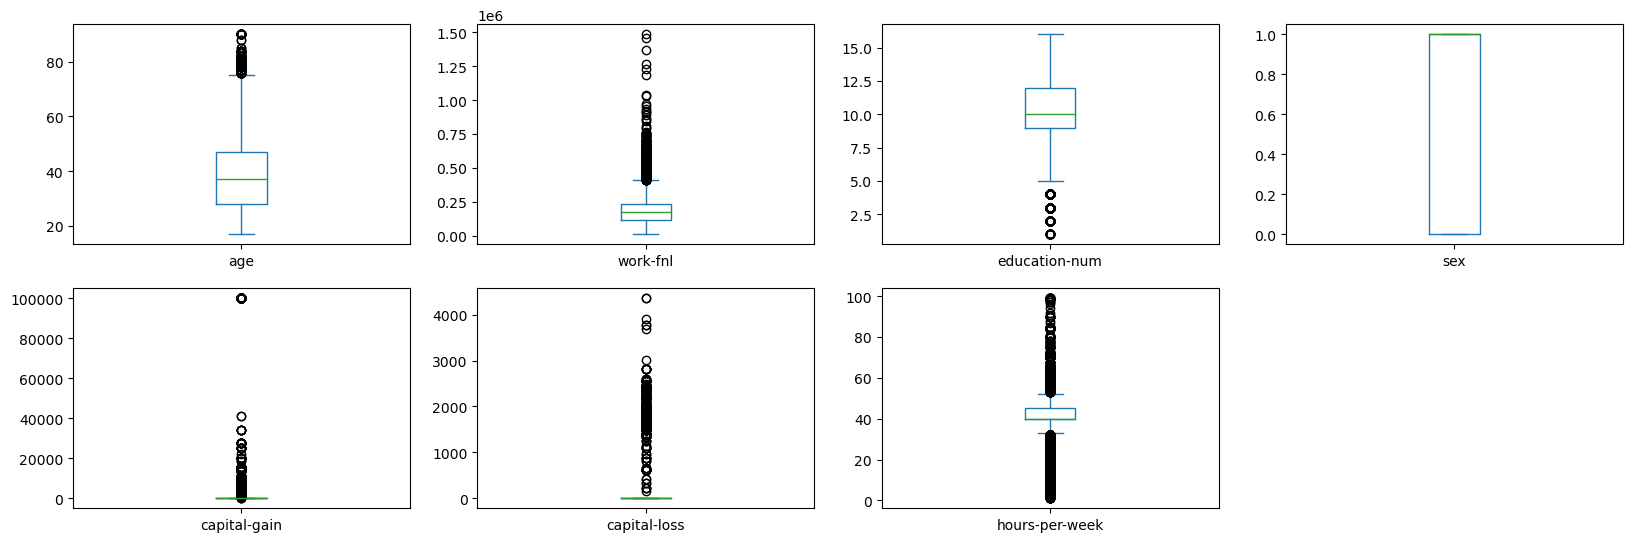

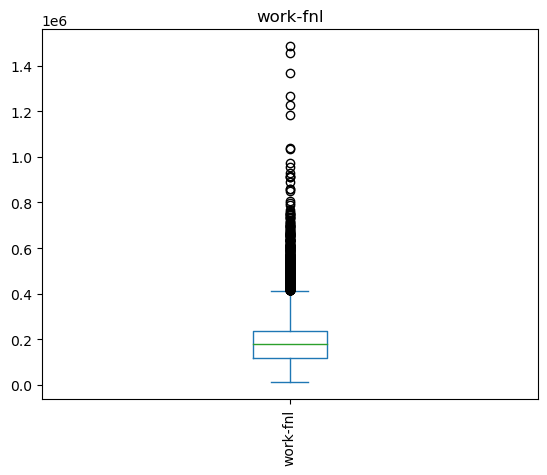

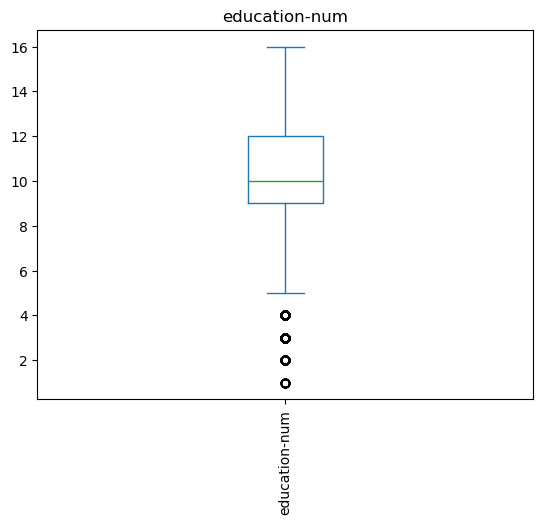

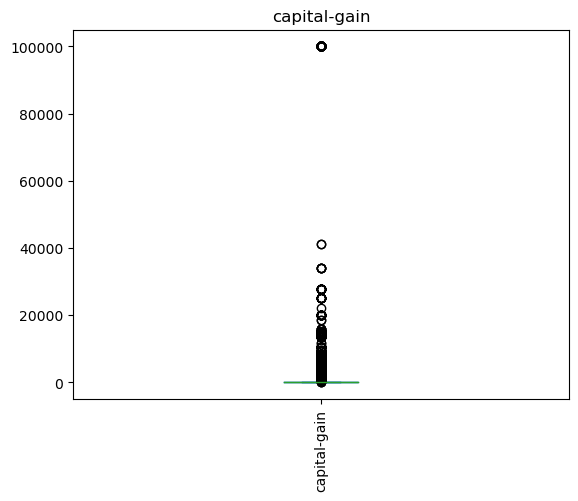

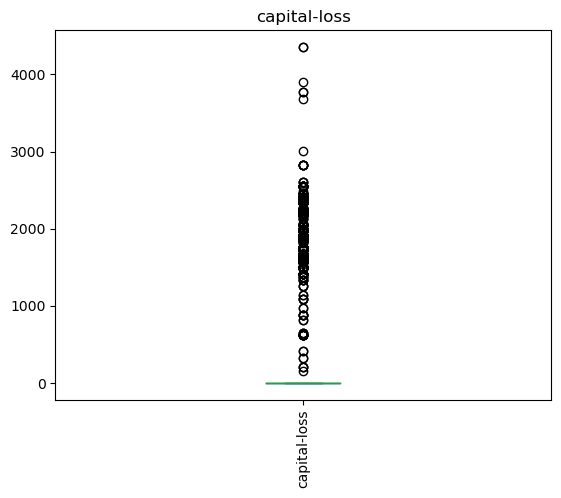

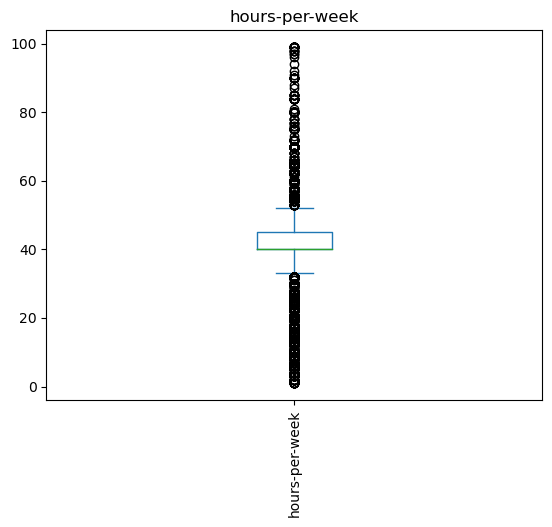

In [1845]:
x_train.plot(kind="box", subplots=True, layout=(6,4), figsize=(20,20))
for i in numerical_cols:
    plt.title(i)
    x_train[i].plot(kind="box", subplots=True, layout=(6,4), figsize=(0,20))
    
    plt.xticks(rotation=90)
    plt.show()


hndrob al cap gain w loss 

In [1846]:
x_train.drop(["capital-loss"], axis = 1, inplace = True) 
x_test.drop(["capital-loss"], axis = 1, inplace = True) 

## 7.Normalize numerical data

In [1849]:
def norm():
    normalize = preprocessing.Normalizer(norm='max')
    normalize.fit(x_train)  
    # X_train = normalize.transform(x_train)
    # X_test = normalize.transform(x_test)
    for i in numerical_cols:
        x_train[i]=normalize.fit_transform(x_train[[i]])  
    

## 8.Models

In [1850]:
x_test

,age,work-fnl,education-num,sex,capital-gain,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,...,Divorced,Married-civ-spouse,Never-married,Separated,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,25,21472,10,0.0,0,22,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,32,90969,11,1.0,0,45,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,26,149734,9,0.0,0,40,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,42,52849,10,1.0,0,40,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,39,106347,10,1.0,0,47,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,19,93518,10,0.0,0,20,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
9765,25,126797,9,1.0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9766,57,25124,9,1.0,0,60,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9767,21,112137,10,0.0,0,20,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


### GradientBoostingClassifier

In [1345]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
GBC_pred = GBC.predict(x_test)

In [1347]:
GBC_pred=pd.DataFrame(GBC_pred, columns = ['salary'])
GBC_pred.replace(0, ' <=50K',inplace=True)
GBC_pred.replace(1,  ' >50K',inplace=True)

In [1348]:
GBC_pred.to_csv('GBC_pred.csv', index=True)

### RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(x_train , y_train)
RFC_pred = RFC.predict(x_test)

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(x_train , y_train)
RFC_pred = gsRFC.predict(x_test)

In [ ]:
RFC_pred=pd.DataFrame(RFC_pred, columns = ['salary'])
RFC_pred.replace(0, ' <=50K',inplace=True)
RFC_pred.replace(1,  ' >50K',inplace=True)

In [ ]:
RFC_pred.to_csv('RFC_pred.csv', index=True)

### LogisticRegression

In [ ]:
logC = LogisticRegression()
logC.fit(x_train, y_train)
logC_pred = logC.predict(x_test)

In [ ]:
logC_pred=pd.DataFrame(logC_pred, columns = ['salary'])
logC_pred.replace(0, ' <=50K',inplace=True)
logC_pred.replace(1,  ' >50K',inplace=True)

In [ ]:
logC_pred.to_csv('gslogC_pred.csv', index=True)

### AdaBoostClassifier

In [ ]:
ac=AdaBoostClassifier()
ac.fit(x_train, y_train)
ac_pred = ac.predict(x_test)

In [ ]:
ac_pred=pd.DataFrame(ac_pred, columns = ['salary'])
ac_pred.replace(0, ' <=50K',inplace=True)
ac_pred.replace(1,  ' >50K',inplace=True)

In [ ]:
ac_pred.to_csv('ac_pred.csv', index=True)

### Extra Trees Classifier

In [ ]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train, y_train)
ETC_pred = ac.predict(x_test)

In [ ]:
ETC_pred=pd.DataFrame(ETC_pred, columns = ['salary'])
ETC_pred.replace(0, ' <=50K',inplace=True)
ETC_pred.replace(1,  ' >50K',inplace=True)

In [ ]:
ETC_pred.to_csv('ETC_pred.csv', index=True)